In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

###  handlin missing  data
from sklearn.impute import SimpleImputer

### libraries for feature selection 
from scipy.stats import chi2_contingency
from scipy import stats

#### added f_classif here as the target value could be a categorical encoded.. :)
from sklearn.feature_selection import chi2, f_regression, f_classif
from sklearn.feature_selection import SelectKBest


In [2]:
### Researched missingno library
# !pip install missingno
import missingno as msno

In [3]:
df_ml=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/current/ML_Data_R_copy.csv", na_values = "?")

In [4]:
### Research: 
### MCAR (Missing Completely at Random)
### MAR (Missing at Random)
### MNAR (Missing Not at Random)
# For missing values... Missing at Random (MAR), MCAR, MNAR.. see if you find these types on the dataframe

# Load original copy dataset which contains missing data
df = pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/current/ML_Data_R_copy.csv")

### Visualize the missingness pattern
### The white lines 
# msno.matrix(df)

### by leveraging missingno library, we identified there are white lines in the 'Delivery Date' column contains missing data
### they are not uniformly distributed, it seems to be concentrated in specific areas of the data
### as our analysis continue, we'll discover the randomness

In [5]:
df_ml_dropna=df_ml.dropna()

In [6]:
df_ml_dropna.head(10)

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,...,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
2,3,66,18072,0,NL,2,6/26/2021,77,4440,30,...,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,17,18181,1,US,2,08/02/2021,11,4440,62,...,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,55,18335,1,DE,7,9/13/2021,2,4481,250,...,C6,L9,NO,3,2022Q4,12,0,No,C,521
5,6,66,18378,0,NL,2,9/27/2021,31,4440,500,...,C6,L9,NO,3,2022Q1,4,0,No,C,3986
6,7,66,18397,0,NL,2,10/04/2021,1,4452,99,...,C6,L9,NO,3,2022Q3,10,0,No,C,3986
7,8,66,18397,0,NL,2,10/04/2021,1,4452,19,...,C6,L9,NO,3,2022Q3,10,0,No,C,3986
8,9,55,18462,1,DE,23,10/25/2021,4,4492,500,...,C6,L9,NO,3,2022Q3,5,0,No,C,521
9,10,55,18462,1,DE,23,10/25/2021,4,4492,100,...,C6,L9,NO,3,2022Q3,5,0,No,C,521
10,11,65,18470,1,NL,7,10/25/2021,2,4481,16,...,C13,L13,NO,3,2022Q3,10,0,No,C,720
11,12,65,18470,1,NL,7,10/25/2021,2,4481,20,...,C13,L13,NO,3,2022Q3,6,0,No,C,720


In [7]:
df_ml.info()
#df_ml_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Record         15890 non-null  int64  
 1   ID                15890 non-null  int64  
 2   Entry ID          15890 non-null  int64  
 3   Strategic Sale    15890 non-null  int64  
 4   Destination       15186 non-null  object 
 5   Group             15890 non-null  int64  
 6   Date              15890 non-null  object 
 7   Sequence          15890 non-null  int64  
 8   Product           15890 non-null  int64  
 9   Qty               15890 non-null  int64  
 10  Total Value       15890 non-null  object 
 11  Unit Price        15890 non-null  float64
 12  Planned Date      15890 non-null  object 
 13  Delivered Date    15571 non-null  object 
 14  TYPE              15890 non-null  object 
 15  Qty Delivered     15571 non-null  float64
 16  Order Source      15890 non-null  object

In [8]:
#df_ml_tr = df_ml.copy()
#df_ml_tr=df_ml_dropna.copy()

In [9]:
#df_ml_tr.isnull().sum()

In [10]:
#### CLEANING DATA - DROPPING ALL Null data
df_ml_dropna.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop.csv",index=False)
# Export missing values dropped data to a new CSV file 'ML_Data_nadrop.csv'
## from this point, we'll be using "df_ml_dropna" for our analysis 

In [11]:
### describe the dataset and visualise - descriptive statistics 
df_ml_dropna.describe

<bound method NDFrame.describe of        ID_Record  ID  Entry ID  Strategic Sale Destination  Group        Date  \
2              3  66     18072               0          NL      2   6/26/2021   
3              4  17     18181               1          US      2  08/02/2021   
4              5  55     18335               1          DE      7   9/13/2021   
5              6  66     18378               0          NL      2   9/27/2021   
6              7  66     18397               0          NL      2  10/04/2021   
...          ...  ..       ...             ...         ...    ...         ...   
15882      15883  65     19580               1          NL     21  12/04/2022   
15883      15884  65     19580               1          NL     23  12/04/2022   
15884      15885  17     19580               1          US     21  12/04/2022   
15885      15886  17     19580               1          US     25  12/04/2022   
15886      15887  17     19580               1          US     21  12/04/20

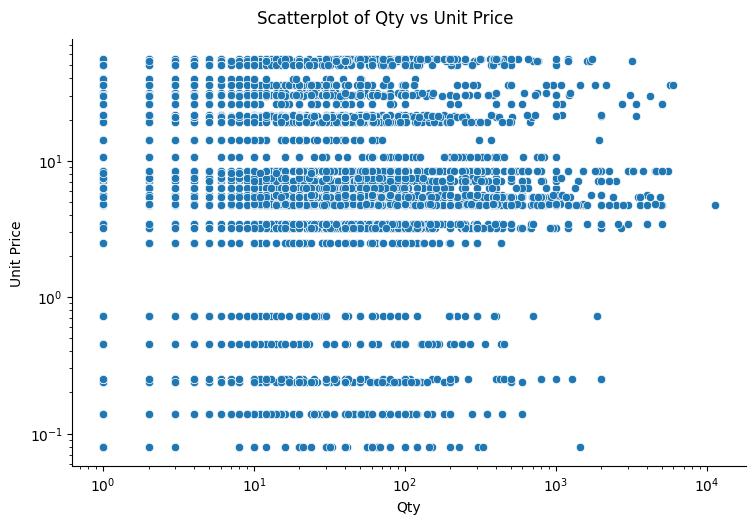

In [ ]:
#### Data Exploration / Visualisation 
###  some scatterplots  - set logaritm scale if necessary 
#g_rel.set(yscale="log",xscale="log") 

g_rel_unit_qty = sns.relplot(x="Qty", y="Unit Price",data=df_ml_dropna,height=5,aspect=1.5)
g_rel_unit_qty.set(yscale="log", xscale="log")
g_rel_unit_qty.fig.suptitle("Scatterplot of Qty vs Unit Price", y=1.03)

plt.xscale("log")
plt.yscale("log")

# scatter plots for all numerical variables
sns.pairplot(df_ml_dropna, height=1)
plt.show()

In [ ]:
### observe outliers

# create a find_outliers function using IQR
def find_outliers(dataframe):
    outliers_dict={}
    for column in dataframe.select_dtypes(include=["float64", "int64"]).columns:
        Q1=dataframe[column].quantile(0.25)
        Q3=dataframe[column].quantile(0.75)
        IQR=Q3-Q1
        outlier_mask=(dataframe[column]<(Q1-1.5*IQR)) | dataframe[column]>(Q3+1.5*IQR)
        outliers_dict[column]=dataframe[column][outlier_mask]
    return outliers_dict

# find outliers in the dataset
outliers=find_outliers(df)

# print the outliers for each column
for column,values in outliers.items():
    print(f'Outliers in {column}:')
    print(values)

In [ ]:
# select numerical columns for visualization
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns

# define the number of rows and columns for the subplot grid
n_cols = 5  # update to a different number based on how many plots you want each row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# create a figure and axes for the subplots
# n_cols '5' is adjustable based on your desired plot size
plt.figure(figsize=(n_cols * 4, n_rows * 4))  

# loop over the numerical columns and create a box plot for each one
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

# for better spacing
plt.tight_layout()
plt.show()

In [ ]:
#### records with value zero 
# Check values zero 
# Check the unique values in the 'Strateg Prod' column
unique_values=df["Strateg Prod"].unique()

# validate 'Strateg Prod' column unique value
if len(unique_values)==1 and unique_values[0]==0:
    print("The 'Strateg Prod' column contains a unique 0 value, it doesn't have correlation with other variables.")
else:
    # If there are multiple unique values, compute the correlation matrix
    correlation_matrix = df.corr()
    print(correlation_matrix["Strateg Prod"])

In [ ]:
### date treatment 
df_ml_tr["Planned Date"]=pd.to_datetime(df_ml_tr["Planned Date"])
df_ml_tr["Date"]=pd.to_datetime(df_ml_tr["Date"])
df_ml_tr["Delivered Date"]=pd.to_datetime(df_ml_tr["Delivered Date"])

#print(df_ml_tr)
#df_ml_tr.head()

In [ ]:
## remove all extra spaces in column name
df_ml_tr.columns=df_ml_tr.columns.str.strip()

In [ ]:
### Values treatment 

#df_ml_tr['Total Value '] = df_ml_tr['Total Value '].str.replace('$', '').str.replace(',', '')
#df_ml_tr['Total Value '] = df_ml_tr['Total Value '].astype(float)

df_ml_tr["Total Value"]=df_ml_tr["Total Value"].str.replace("$", "").str.replace(",", "").astype(float)

#df_ml_tr.head()
df_ml_tr.info()

In [ ]:
### # export partially processed data to a new CSV file
## df_ml_tr.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded.csv", index=False)
## from this point, we'll be using "df_ml_dropna_encoded.csv" for our analysis 

In [ ]:
## load updated csv
df_ml_tr=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded.csv")

In [ ]:
#### handling missing data 
#### impute the overall mean to zero prices

df_ml_tr["Unit Price"]=df_ml_tr["Unit Price"].replace(0, np.nan)
imputer=SimpleImputer(strategy="mean")

# impute the missing values in "Unit Price" column
df_ml_tr["Unit Price"]=imputer.fit_transform(df_ml_tr[["Unit Price"]])

df_ml_tr["Unit Price"].isnull().sum()
#print(df_ml_tr.head())

In [ ]:
## check the average of prices by product --- what would be the best practice here? 
average_price_per_product=df_ml_tr.groupby("Product")["Unit Price"].mean()
average_price_per_product.info()

In [ ]:
#### handling missing data - Categories 

## impute zeros categories by most-frequent - ABC 
### Has ABC any relationship to any other variables?  what would be the best practice here? 

# we're loading the most recent data set ML_Data_nadrop_encoded.csv

imputer=SimpleImputer(strategy="most_frequent", missing_values=0)

# convert data set to 1 dimension 
df_ml_tr["ABC"]=imputer.fit_transform(df_ml_tr[["ABC"]]).ravel()

# apply F-test ANOVA
# we'll need to make sure 'ABC' column is treated as categorical
df_ml_tr["ABC"] = df_ml_tr["ABC"].astype("category")

## we identified 'Total Value' and 'Unit Price' columns to run F-test

# for "Total Value"
grouped_total_value = df_ml_tr.groupby('ABC')['Total Value']
f_val_total_value, p_val_total_value = stats.f_oneway(*[group for name, group in grouped_total_value])
print("ANOVA F-test for 'Total Value' across 'ABC' categories:")
print("F-value:", f_val_total_value)
print("P-value:", p_val_total_value)

# for "Unit Price"
grouped_unit_price = df_ml_tr.groupby("ABC")["Unit Price"]
f_val_unit_price, p_val_unit_price = stats.f_oneway(*[group for name, group in grouped_unit_price])
print("\nANOVA F-test for 'Unit Price' across 'ABC' categories:")
print("F-value:", f_val_unit_price)
print("P-value:", p_val_unit_price)

In [ ]:
#### Encoding 
# Encode your data set to use Feature Selection 
#### encode all the object and convert as categories
#### create categories for type cat columns ( "TYPE" SALE or RETURN "Replacement" NO or YES "Strat Customer" Yes or No )
### df_ml_cat.select_dtypes(include=['object']).columns

# load csv
df_ml_cat_tr=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded.csv")

df_ml_cat_tr["TYPE"]=df_ml_cat_tr["TYPE"].map({"SALE": 1, "RETURN": 0})
df_ml_cat_tr["Replacement"]=df_ml_cat_tr["Replacement"].map({"YES": 1, "NO": 0})
df_ml_cat_tr["Strat Customer"]=df_ml_cat_tr["Strat Customer"].map({"Yes": 1, "No": 0})

df_ml_cat_tr.head()

## export categoricial to a new csv
#df_ml_cat_tr.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded_categorical_tr.csv", index=False)


In [ ]:
# load latest treated csv
df_ml_cat_tr=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded_categorical_tr.csv")
# df_ml_cat_tr.info()

In [ ]:
# ensure the ther are only "SALE - 1" and "RETURN - 0" in the TYPE column
type_unique_values = df_ml_cat_tr["TYPE"].unique()
type_unique_values

In [ ]:
# "Destination" column is still as string, we'll encoded with 1,2,3 to represent each of the destination
unique_countries=df_ml_cat_tr["Destination"].unique()

# create a dict for countries
country_encoding = {
    "AT": 1111,
    "BE": 2222,
    "DE": 3333,
    "ES": 4444,
    "FR": 5555,
    "GB": 6666,
    "GR": 7777,
    "IE": 8888,
    "IT": 9999,
    "NL": 1010,
    "PT": 1111,
    "SE": 1212,
    "US": 1313
}

# encode "Destination" using the dict
df_ml_cat_tr["Destination_encoded"]=df_ml_cat_tr["Destination"].map(country_encoding)

print(df_ml_cat_tr[df_ml_cat_tr["Destination_encoded"].isna()])

# drop original "Destination" column
df_ml_cat_tr.drop("Destination", axis=1, inplace=True)

In [ ]:
### next we exported csv named: "ML_Data_nadrop_encoded_categorical_country_tr.csv" 
#df_ml_cat_tr.to_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded_categorical_country_tr.csv", index=False)


In [ ]:
# load new csv
df_ml_cat_to_tr=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded_categorical_country_tr.csv")


In [ ]:
## Label Encoding for "Strateg Prod"
# label_encoder=LabelEncoder()
# df_ml_cat_to_tr["Strateg_Prod_encoded"]=label_encoder.fit_transform(df_ml_cat_to_tr["Strateg Prod"])

### Now you would drop the original "Strateg Prod" column to avoid duplicating features
# df_ml_cat_to_tr.drop("Strateg Prod",axis=1,inplace=True)

In [ ]:
#### Feature Selection  
#### Select fields that contributes to the Return Prediction Model 

##using correlation 

### observe the correlation (heat map) what is possible to conclude?

## IS correlation the best method for Future Selection? 

In [ ]:

# "TYPE" is our target and already encoded as 0 and 1, selecting only numerical columns that are not date 
X=df_ml_cat_to_tr.select_dtypes(include=["number"]).drop(columns=["TYPE"])
y=df_ml_cat_to_tr["TYPE"]  # target variable

# apply SelectKBest feature selection
selector=SelectKBest(score_func=chi2,k="all")  # 'k' is the number of features to select
X_new=selector.fit_transform(X, y)

# get the scores and p-values for each feature
feature_scores=pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_,
    "p-value": selector.pvalues_
})


# ranking the scores and p-values separately.
feature_scores["Score_rank"]=feature_scores["Score"].rank(ascending=False)
feature_scores["p-value_rank"]=feature_scores["p-value"].rank(ascending=True)

# sort by score and p-value rank.
sorted_by_score_rank=feature_scores.sort_values("Score_rank", ascending=True)
sorted_by_pvalue_rank=feature_scores.sort_values("p-value_rank", ascending=True)

# printing the sorted by results
print(sorted_by_score_rank[["Feature","Score","Score_rank"]])
print(sorted_by_pvalue_rank[["Feature","p-value","p-value_rank"]])


In [ ]:
### visualization
# sorting the DataFrame by score rank
sorted_by_score_rank = feature_scores.sort_values("Score_rank", ascending=False)

# sorting the DataFrame by p-value rank
sorted_by_pvalue_rank = feature_scores.sort_values("p-value_rank", ascending=False)


# plotting the scores
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_by_score_rank, x="Score_rank", y="Feature", orient="h", edgecolor="black")
plt.title("Feature Scores Rank")
plt.xlabel("Rank")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# plotting the p-values
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_by_pvalue_rank, x="p-value_rank", y="Feature", orient="h", edgecolor="black")
plt.title("Feature p-values Rank")
plt.xlabel("Rank")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
### use heat map to correlate the Return Prediction Model
##using correlation 
### observe the correlation (heat map) what is possible to conclude?
## IS correlation the best method for Future Selection? - 
##### ANSWER: this is not an effective way for feature selection compare to SelectKBest feature selection


# load new csv
df_ml_cat_to_tr=pd.read_csv("/Users/eupirate/Desktop/CCT/CA2三月_Data_Explore/CA2 - Data Exploration amp Preparation - Instructions-20240329/ML_Data_nadrop_encoded_categorical_country_tr.csv")

# exclude specified columns
cols_to_exclude=["Date", "Planned Date", "Delivered Date", "Quarter", "ABC"]
df_for_corr=df_ml_cat_to_tr.drop(cols_to_exclude, axis=1).select_dtypes(include=[np.number])

# compute the correlation matrix
corr=df_for_corr.corr()

# generate a mask for the upper triangle - for better readability 
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax= plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap=sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Heatmap of Correlation Between Features Excluding all Dates and ABC columns")
plt.show()

In [ ]:
### select all relevant columns - example below ##

## Using SelectKBest  
## get all the relevant fields recommented by the model 

#columns  = ['ABC','Customer Group','Strateg Prod','Strategic Sale','Group','Product','Order Source','Logistic Partner','Deposit','Replacement','Week']

# columns to exclude: you may want to add or remove columns based on your CSV
cols_to_exclude=["Planned Date", "Date", "Delivered Date", "Quarter", "ABC", "TYPE"]

# drop the columns that we do not want to include
X=df_ml_cat_to_tr.drop(cols_to_exclude, axis=1)

# encode non-numeric data, assuming all categorical variables are type "object"
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    label_encoder=LabelEncoder()
    X[column]=label_encoder.fit_transform(X[column])
    label_encoders[column]=label_encoder

# ensure target variable "TYPE" is type "object"
if df_ml_cat_to_tr["TYPE"].dtype == "object":
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df_ml_cat_to_tr["TYPE"])
else:
    y = df_ml_cat_to_tr["TYPE"]

# apply SelectKBest to extract top k features
k="all"  # select all features
selector=SelectKBest(score_func=chi2, k=k)
X_new=selector.fit_transform(X, y)

# get the scores for each feature
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_,
    "p-value": selector.pvalues_
}).sort_values(by="Score", ascending=False)

# Display the feature scores
print(feature_scores)


In [ ]:
############### here is the current dataframe used by the ML Return Model 

### final dataset processed with columns example : 
#Customer Group 	Group 	Product 	Deposit 	Week

# replace the "L" in "Deposit" with 0
df_ml_cat_to_tr["Deposit"]=pd.to_numeric(df_ml_cat_to_tr["Deposit"].str.replace("L", ""), errors="coerce").fillna(0)

# select above columns, "TYPE" is the target
columns=["Customer Group","Group","Product","Deposit","Week","TYPE"]

# copy the selected columns
df_selected=df_ml_cat_to_tr[columns].copy()

# encodinglabel_encoder with below columns
categorical_columns=["Customer Group","Group","Product","Week"] 

for column in categorical_columns:
    df_selected[column]=label_encoder.fit_transform(df_selected[column])

# compute the correlation matrix
correlation_matrix = df_selected.corr()

# print correlation with "TYPE"
print(correlation_matrix["TYPE"]) 

# heatmap with mask for better readability 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix with TYPE")
plt.show()

In [ ]:
### by creating extra columns in your improved code (Feature engineering) , what will be the change in your dataframe, any relevant change? 
#### test this hipothesis  in your improved code 